1. UČITAVANJE PODATAKA

Učitavamo podatke iz datoteke "arrhythmia.data".

In [153]:
import pandas as pd

X = pd.read_csv("arrhythmia.data", header=None)
print(X.shape)
X.head()


(452, 280)


,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7


In [154]:
X = X.drop(list(range(51, 159)), axis=1)
X = X.drop(list(range(189, 280)), axis=1)
print(X.shape)
X.head()

(452, 81)


,0,1,2,3,4,5,6,7,8,9,...,179,180,181,182,183,184,185,186,187,188
0,75,0,190,80,91,193,371,174,121,-16,...,0.1,-5.2,1.4,0.0,0.0,0.0,0.8,-0.6,-10.7,-15.6
1,56,1,165,64,81,174,401,149,39,25,...,0.3,-1.6,0.9,0.0,0.0,0.0,-0.3,0.4,-1.5,1.3
2,54,0,172,95,138,163,386,185,102,96,...,-0.2,-0.6,4.4,0.0,0.0,0.0,0.5,0.2,24.7,26.2
3,55,0,175,94,100,202,380,179,143,28,...,-0.4,-0.4,1.6,-2.2,0.0,0.0,-1.0,-0.9,-1.5,-9.2
4,75,0,190,80,88,181,360,177,103,-16,...,0.2,-3.8,1.2,0.0,0.0,0.0,1.0,-0.6,-7.7,-13.4


In [155]:
#X.info()

Podaci prikazuju ECG za 452 pacijenta pri čemu svaki zapis sadržava 279 značajki.

1 Age: Age in years , linear

2 Sex: Sex (0 = male; 1 = female) , nominal

3 Height: Height in centimeters , linear

4 Weight: Weight in kilograms , linear

5 QRS duration: Average of QRS duration in msec., linear

6 P-R interval: Average duration between onset of P and Q waves in msec., linear

7 Q-T interval: Average duration between onset of Q and offset of T waves in msec., linear

8 T interval: Average duration of T wave in msec., linear

9 P interval: Average duration of P wave in msec., linear
Vector angles in degrees on front plane of:, linear

10 QRS

11 T

12 P

13 QRST

14 J

15 Heart rate: Number of heart beats per minute ,linear

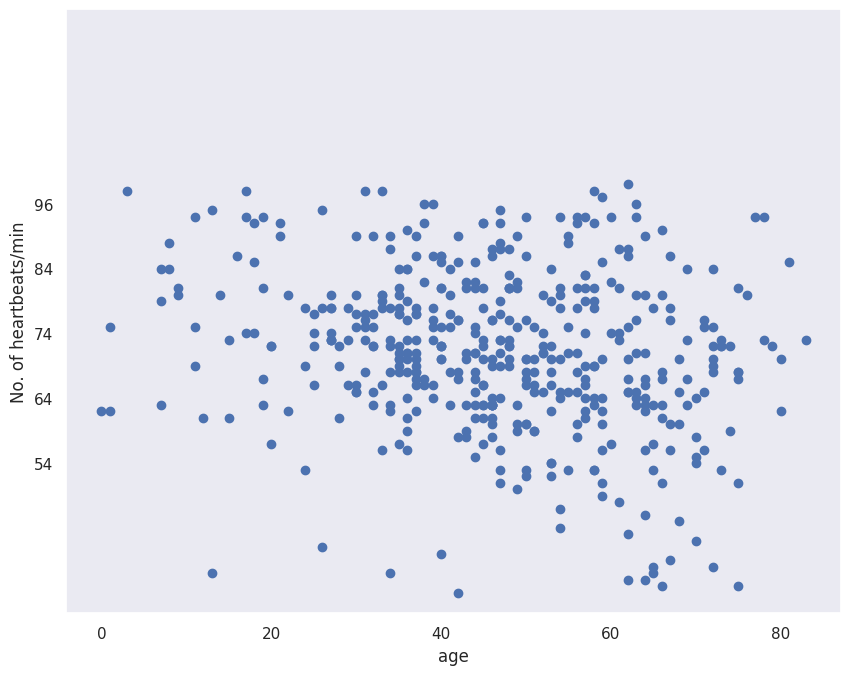

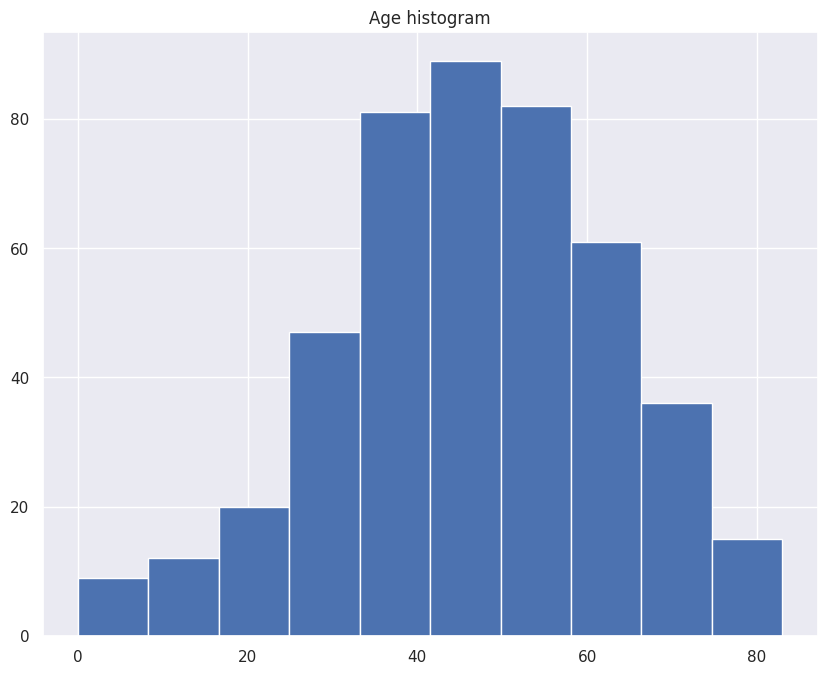

Najmlađi ispitanik:  0
Najstariji ispitanik:  83


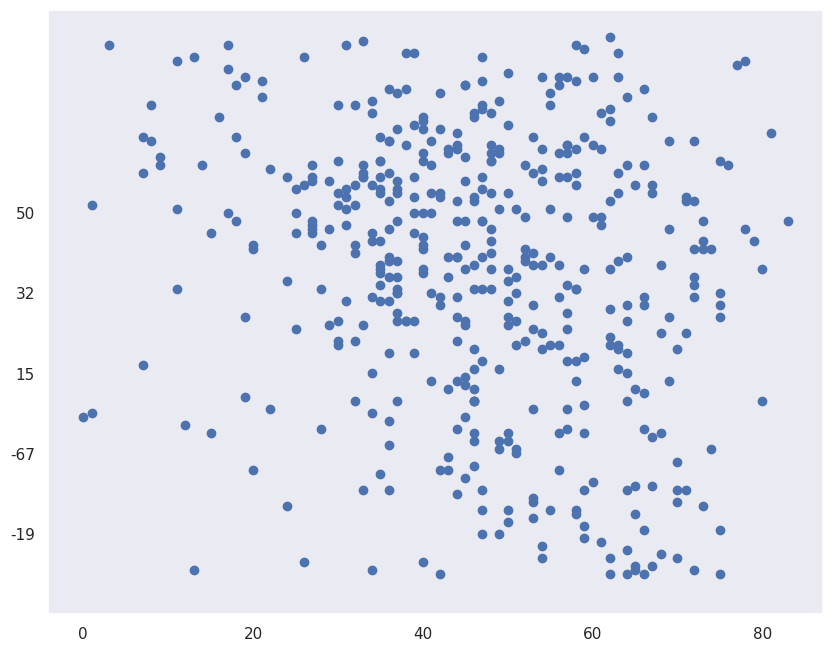

In [197]:
import matplotlib.pyplot as plt
#age vs no.of heartbeats/min

plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
plt.scatter(X.iloc[:, 0], X.iloc[:, 14].sort_values())
plt.xlabel('age')
plt.ylabel('No. of heartbeats/min')
plt.yticks(np.arange(20, 100, 10))
plt.grid()
plt.show()

plt.hist(X.iloc[:, 0])
plt.title('Age histogram')
plt.show()
print('Najmlađi ispitanik: ', X.iloc[:, 0].min())
print('Najstariji ispitanik: ', X.iloc[:, 0].max())

plt.scatter(X.iloc[:, 0], X.iloc[:, 12].sort_values())
plt.yticks(np.arange(-10, 100, 20))
plt.grid()
plt.show()

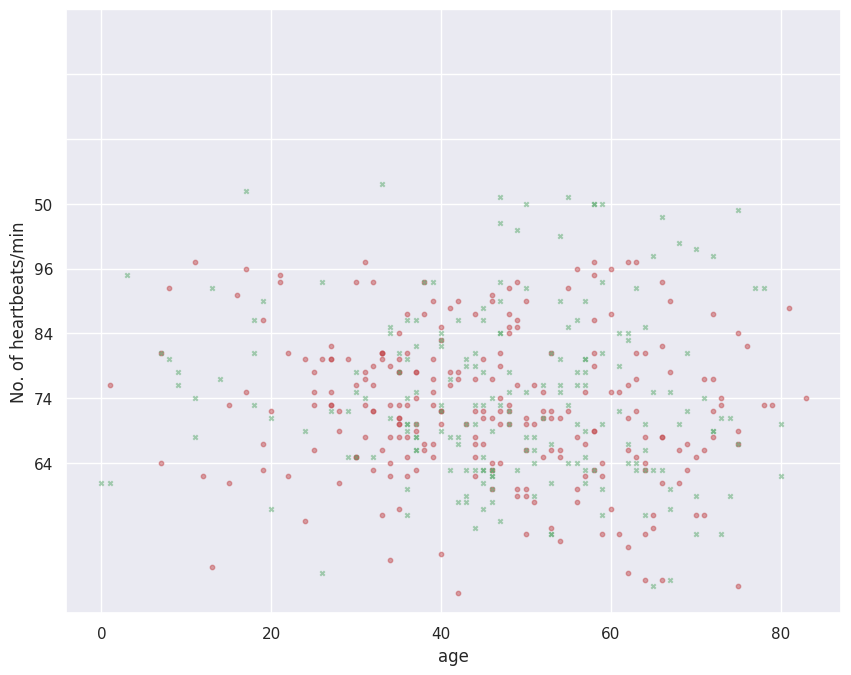

In [199]:
X_tmp = X.copy()

mask_spol_z = X_tmp[1] == 1

age_women = X_tmp.loc[mask_spol_z, 0]
age_men = X_tmp.loc[~mask_spol_z, 0]

hb_women = X_tmp.loc[mask_spol_z, 14].sort_values()
hb_men = X_tmp.loc[~mask_spol_z, 14].sort_values()

plt.scatter(age_women, hb_women, s=10, alpha=0.5, c='r', label='women')
plt.scatter(age_men, hb_men, s=10, alpha=0.5, c='g', marker='x', label='men')
plt.xlabel('age')
plt.ylabel('No. of heartbeats/min')
plt.yticks(np.arange(20, 100, 10))
plt.show()

In [181]:
print(X.describe())
#provjeri stršeće vrijednosti
X_tmp = X.copy()

TypeError: ignored

In [182]:
import numpy as np
#check unknown values written as '?'
cols = X.columns.values
nan_values = dict()
for c in cols:
  val = (X[c] == '?').sum()
  if val != 0:
    nan_values[c] = val
print(nan_values)

#replace all '?' with None
X_tmp = X_tmp.replace('?', np.nan)

{10: 8, 11: 22, 12: 1, 13: 376, 14: 1}


{0: 77, 1: 2, 2: 53, 3: 76, 4: 67, 5: 106, 6: 132, 7: 129, 8: 90, 9: 160, 10: 171, 11: 102, 12: 135, 13: 70, 14: 64, 15: 11, 16: 28, 17: 20, 18: 4, 19: 1, 20: 18, 21: 2, 22: 2, 23: 2, 24: 2, 25: 2, 26: 2, 27: 11, 28: 26, 29: 20, 30: 7, 31: 3, 32: 17, 33: 2, 34: 2, 35: 2, 36: 2, 37: 2, 38: 2, 39: 22, 40: 25, 41: 22, 42: 16, 43: 4, 44: 22, 45: 2, 46: 2, 47: 2, 48: 2, 49: 2, 50: 2, 159: 32, 160: 17, 161: 111, 162: 52, 163: 3, 164: 1, 165: 24, 166: 56, 167: 268, 168: 296, 169: 35, 170: 25, 171: 137, 172: 58, 173: 8, 174: 3, 175: 37, 176: 68, 177: 290, 178: 326, 179: 34, 180: 62, 181: 105, 182: 87, 183: 24, 184: 6, 185: 34, 186: 56, 187: 304, 188: 318}


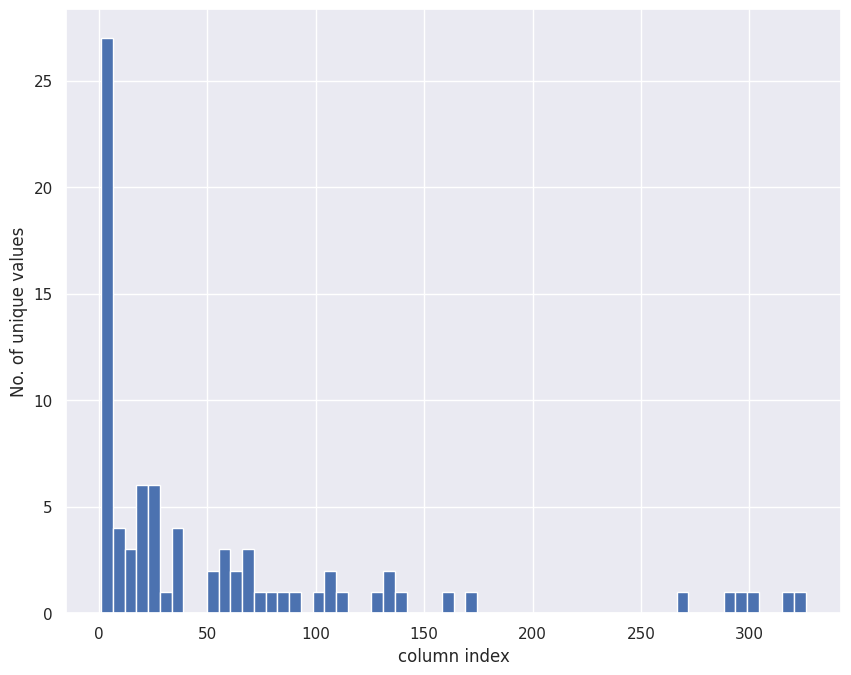

In [160]:
nunique_data = X.nunique().to_dict()
print(nunique_data)
plt.hist(X.nunique(), bins=60)
plt.xlabel('column index')
plt.ylabel('No. of unique values')
plt.show()

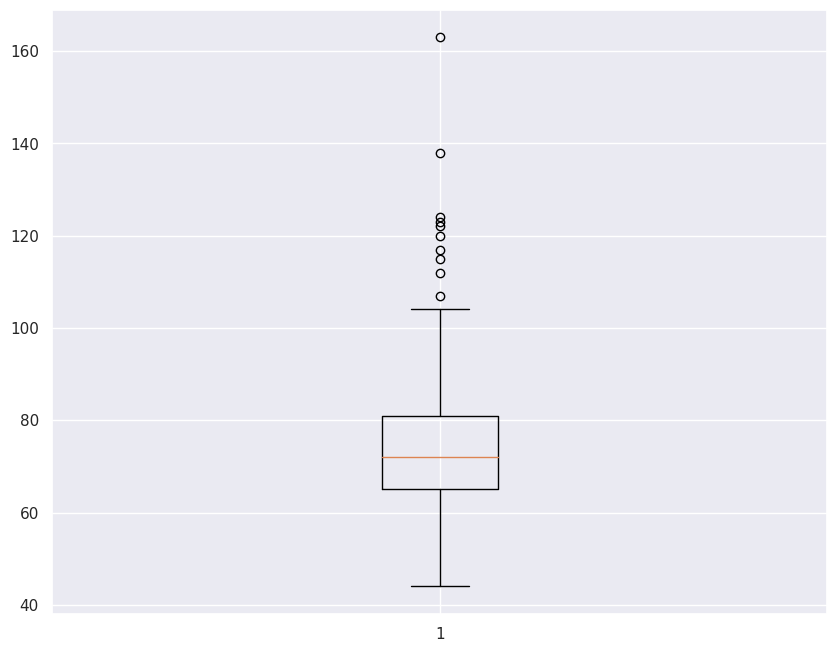

In [161]:
#nedostajući podaci za otkucaje srca
X_tmp = X_tmp.loc[X_tmp[14].notnull(), :]
#boxplot broja otkucaja/min
plt.boxplot(X_tmp.iloc[:, 14].astype('float'))
plt.show()

In [162]:
# izbaci stupac za J
X_tmp.drop([13], axis=1, inplace=True)

In [163]:
# izbaci redak za QRST gdje je vrijednost '?'
X_tmp = X_tmp.loc[X_tmp[12].notnull(), :]

#za stupce T i P aproksimiraj srednjom vrijednosti
X_tmp.loc[X_tmp[10].isna(), 10] = X_tmp.iloc[:, 10].astype('float').mean()
X_tmp.loc[X_tmp[11].isna(),11] = X_tmp.iloc[:, 11].astype('float').mean()


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


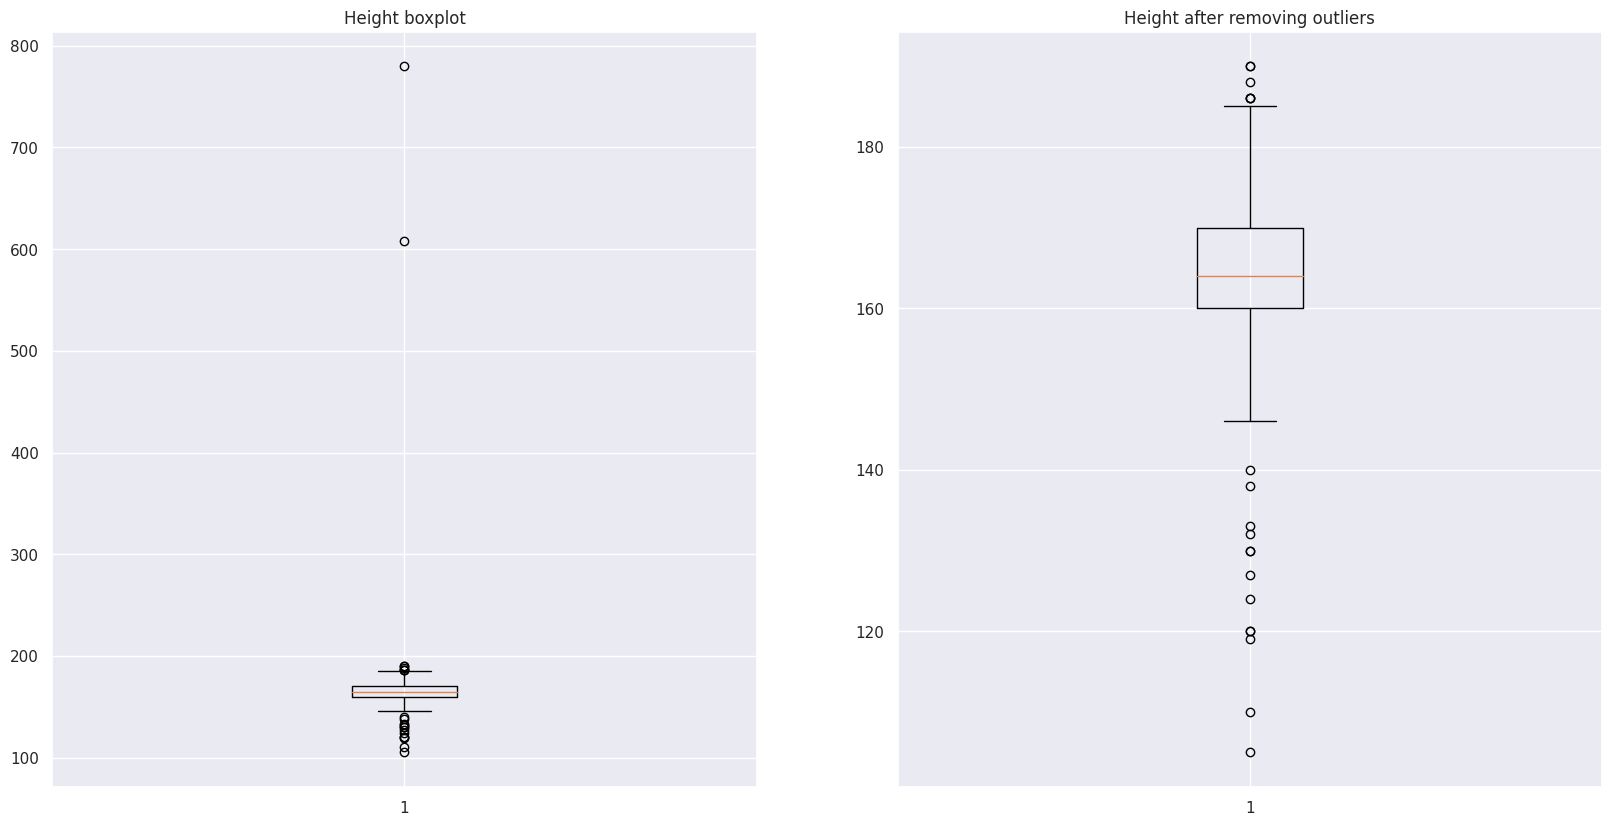

In [164]:
#boxplot visine
fig, ax = plt.subplots(1, 2, figsize=(20, 10)) 
ax[0].boxplot(X_tmp.iloc[:, 2].astype('float'))
ax[0].title.set_text('Height boxplot')

X_tmp = X_tmp[X_tmp[2] < 250]
ax[1].boxplot(X_tmp.iloc[:, 2].astype('float'))
ax[1].title.set_text('Height after removing outliers')
plt.show()

Prikazujemo u boxplotu 3 vrijednosti koje se čine da bi mogli biti outlieri, ali su mogući, pa ih ostavljamo u datasetu.

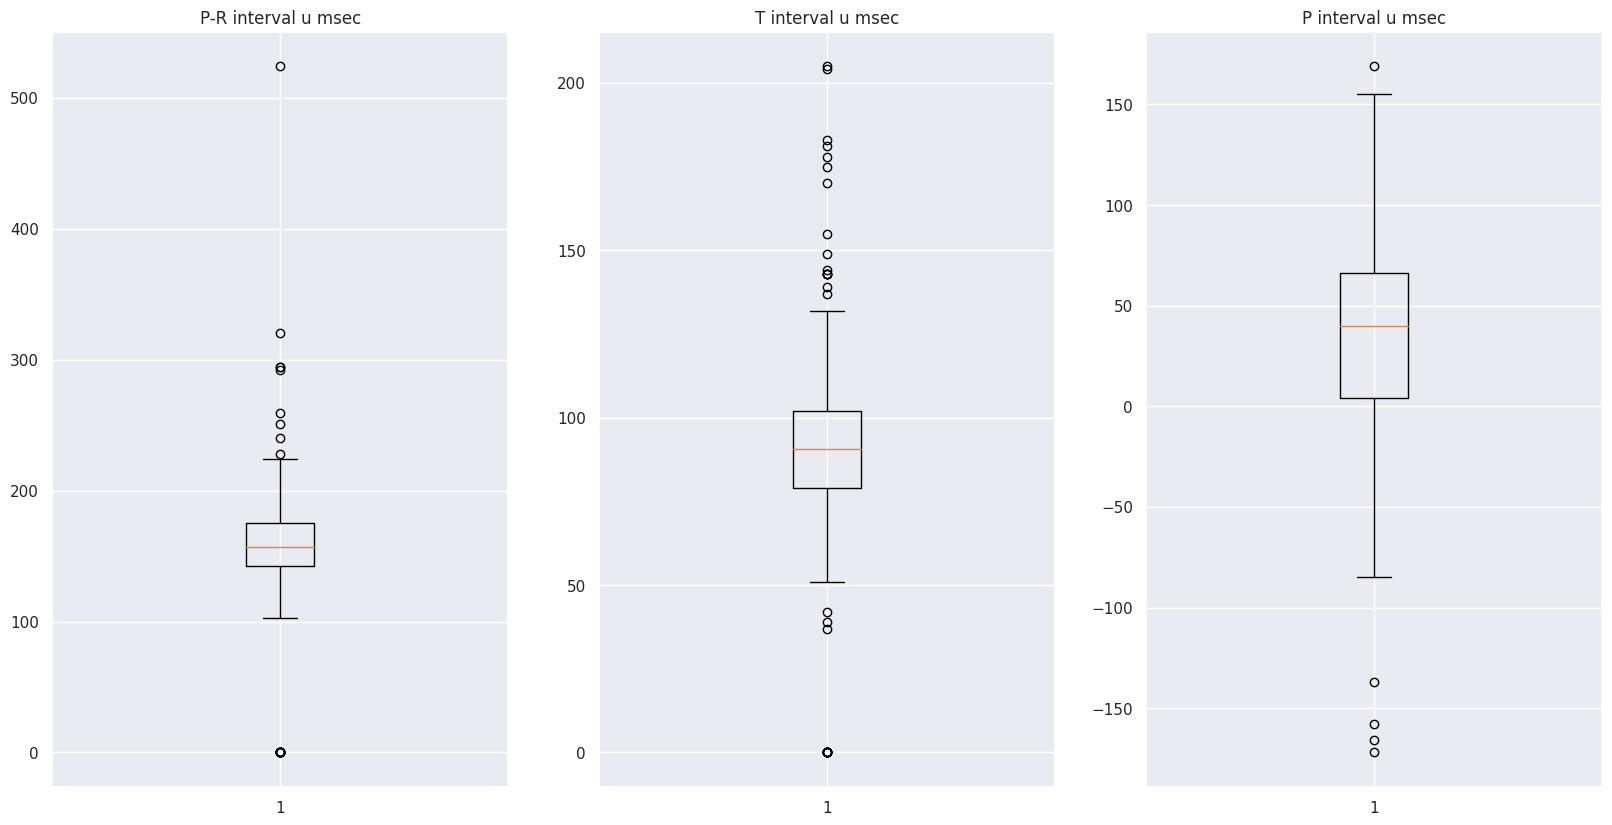

In [165]:
#boxplot P-R intervala u msec, T intervala i P intervala
fig, ax = plt.subplots(1, 3, figsize=(20, 10)) 
ax[0].boxplot(X_tmp.iloc[:, 5].astype('float'))
ax[0].title.set_text('P-R interval u msec')
ax[1].boxplot(X_tmp.iloc[:, 8].astype('float'))
ax[1].title.set_text('T interval u msec')
ax[2].boxplot(X_tmp.iloc[:, 9].astype('float'))
ax[2].title.set_text('P interval u msec')

plt.show()

In [166]:
X_15 = X_tmp.iloc[:, :15].copy()
X_15.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,14,15
161,42,1,160,68,81,147,337,131,96,-1,-1,46,-1,85,0
45,75,1,156,55,73,159,350,138,99,-18,60,57,-1,89,0
409,66,1,160,70,76,160,368,153,75,0,-5,-27,-1,66,0
91,64,1,155,88,82,194,342,138,126,-4,36.68552,64,-1,85,0
38,62,1,163,60,80,185,354,166,107,-2,3,40,-1,75,0


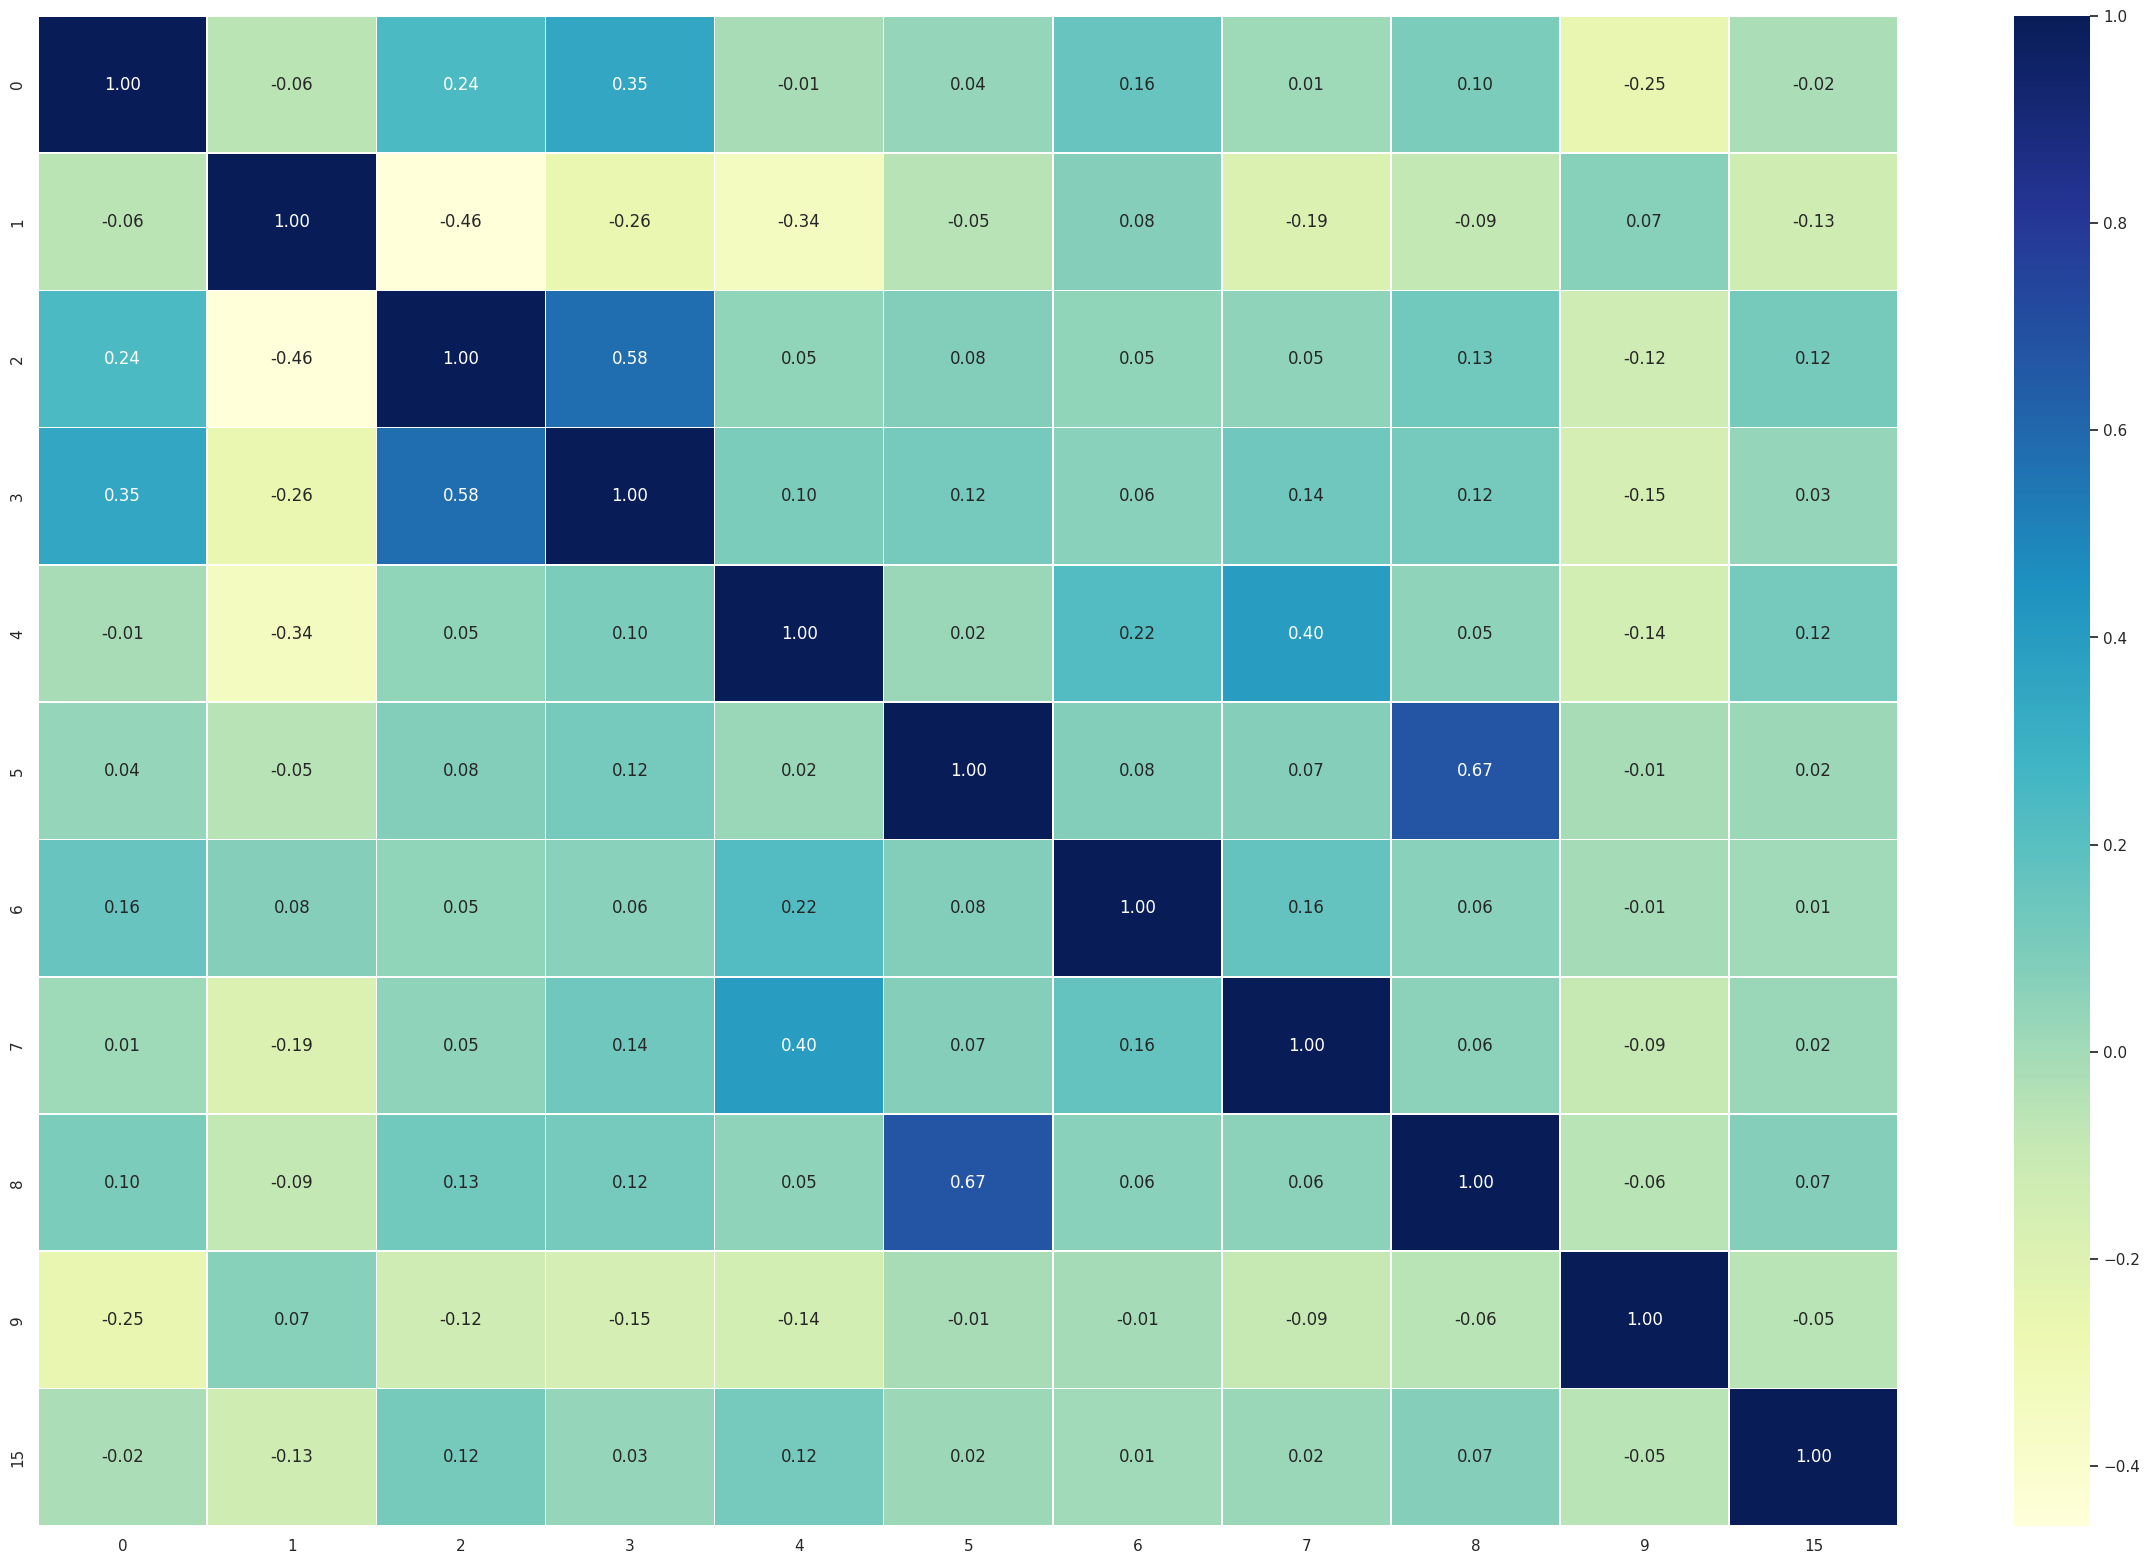

In [167]:
import seaborn as sns
sns.set(rc={'figure.figsize':(30,20)})
sns.heatmap(X_15.corr(), annot=True, fmt=".2f", cmap="YlGnBu", linewidths=.5)
plt.show()

Među visoko koreliranim značajkama imamo:

visina i težina ispitanika (0.57)

P-interval i P-R interval (0.67)

Visina i spol(-0.46)

In [168]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
kbest = SelectKBest(mutual_info_classif, k=7)

y_ = X_tmp.loc[:, 14]
X_ = X_tmp.loc[:, X_tmp.columns != 14]

kbest.fit(X_, y_)
X_.columns[kbest.get_support()].values

array([  1,   4,   6,  15,  48,  49, 175])

Metoda korištenja informacijske dobiti(mutual information).

Korištenjem ove metode za broj otkucaja srca u minuti, dobili smo rezultat da je najvažnijih 7 značajki:

- Spol osobe
- prosječno trajanje QRS impulsa u milisekundama
- prosječno vrijeme trajanja Q-T intervala u milisekundama
- prosječna širina Q vala u milisekundama
- amplituda R' vala [*0.1 milivolt]
- amplituda T vala [*0.1 milivolt]

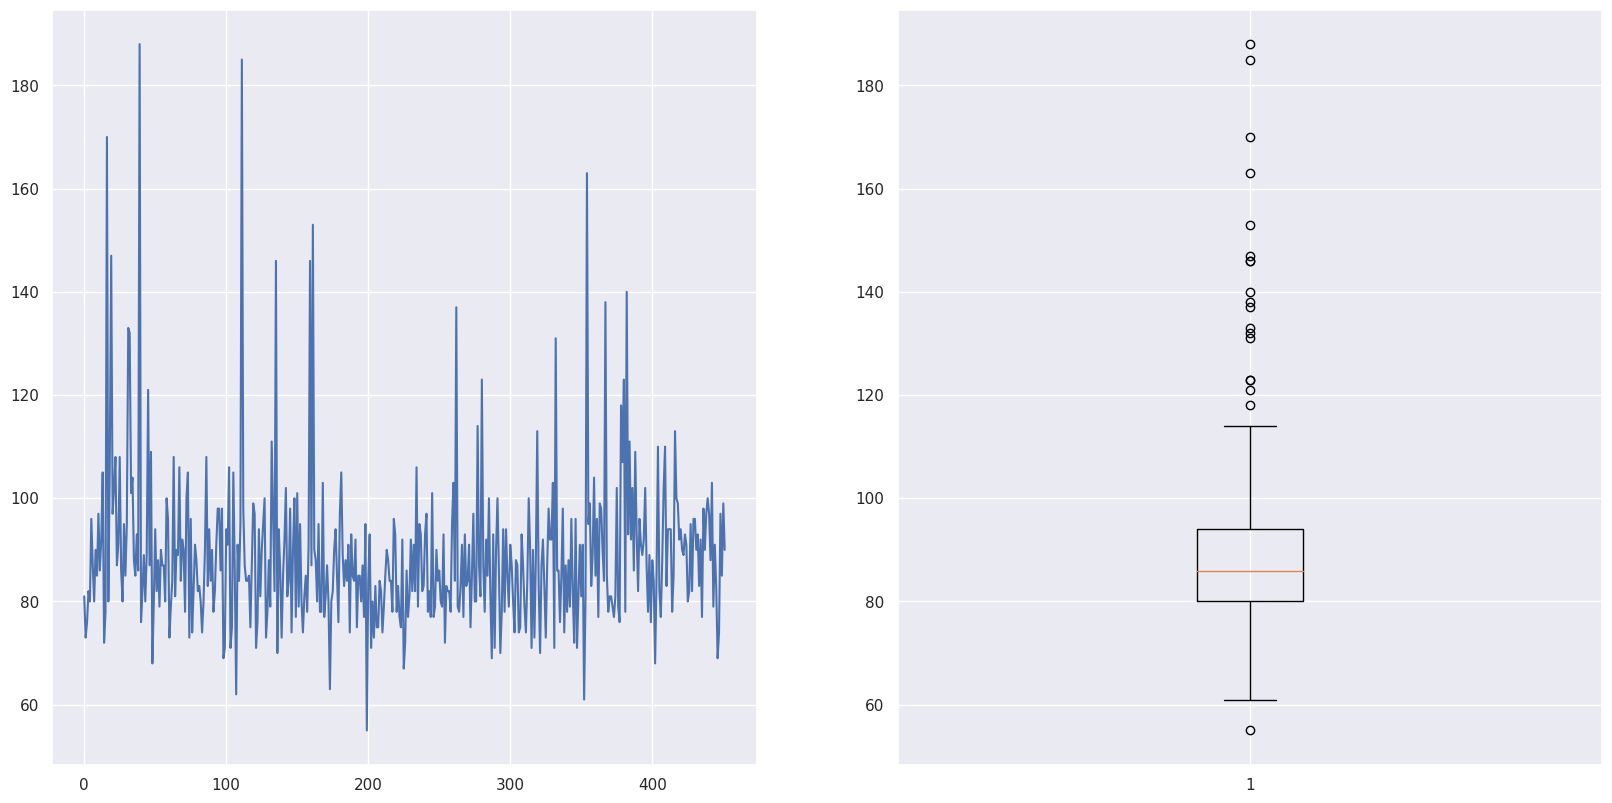

In [210]:
fig, ax = plt.subplots(1,2, figsize=(20,10)) 
ax[0].plot([x for x in range(len(X_tmp))], X_tmp[4])

ax[1].boxplot(X_tmp[4])
plt.show()

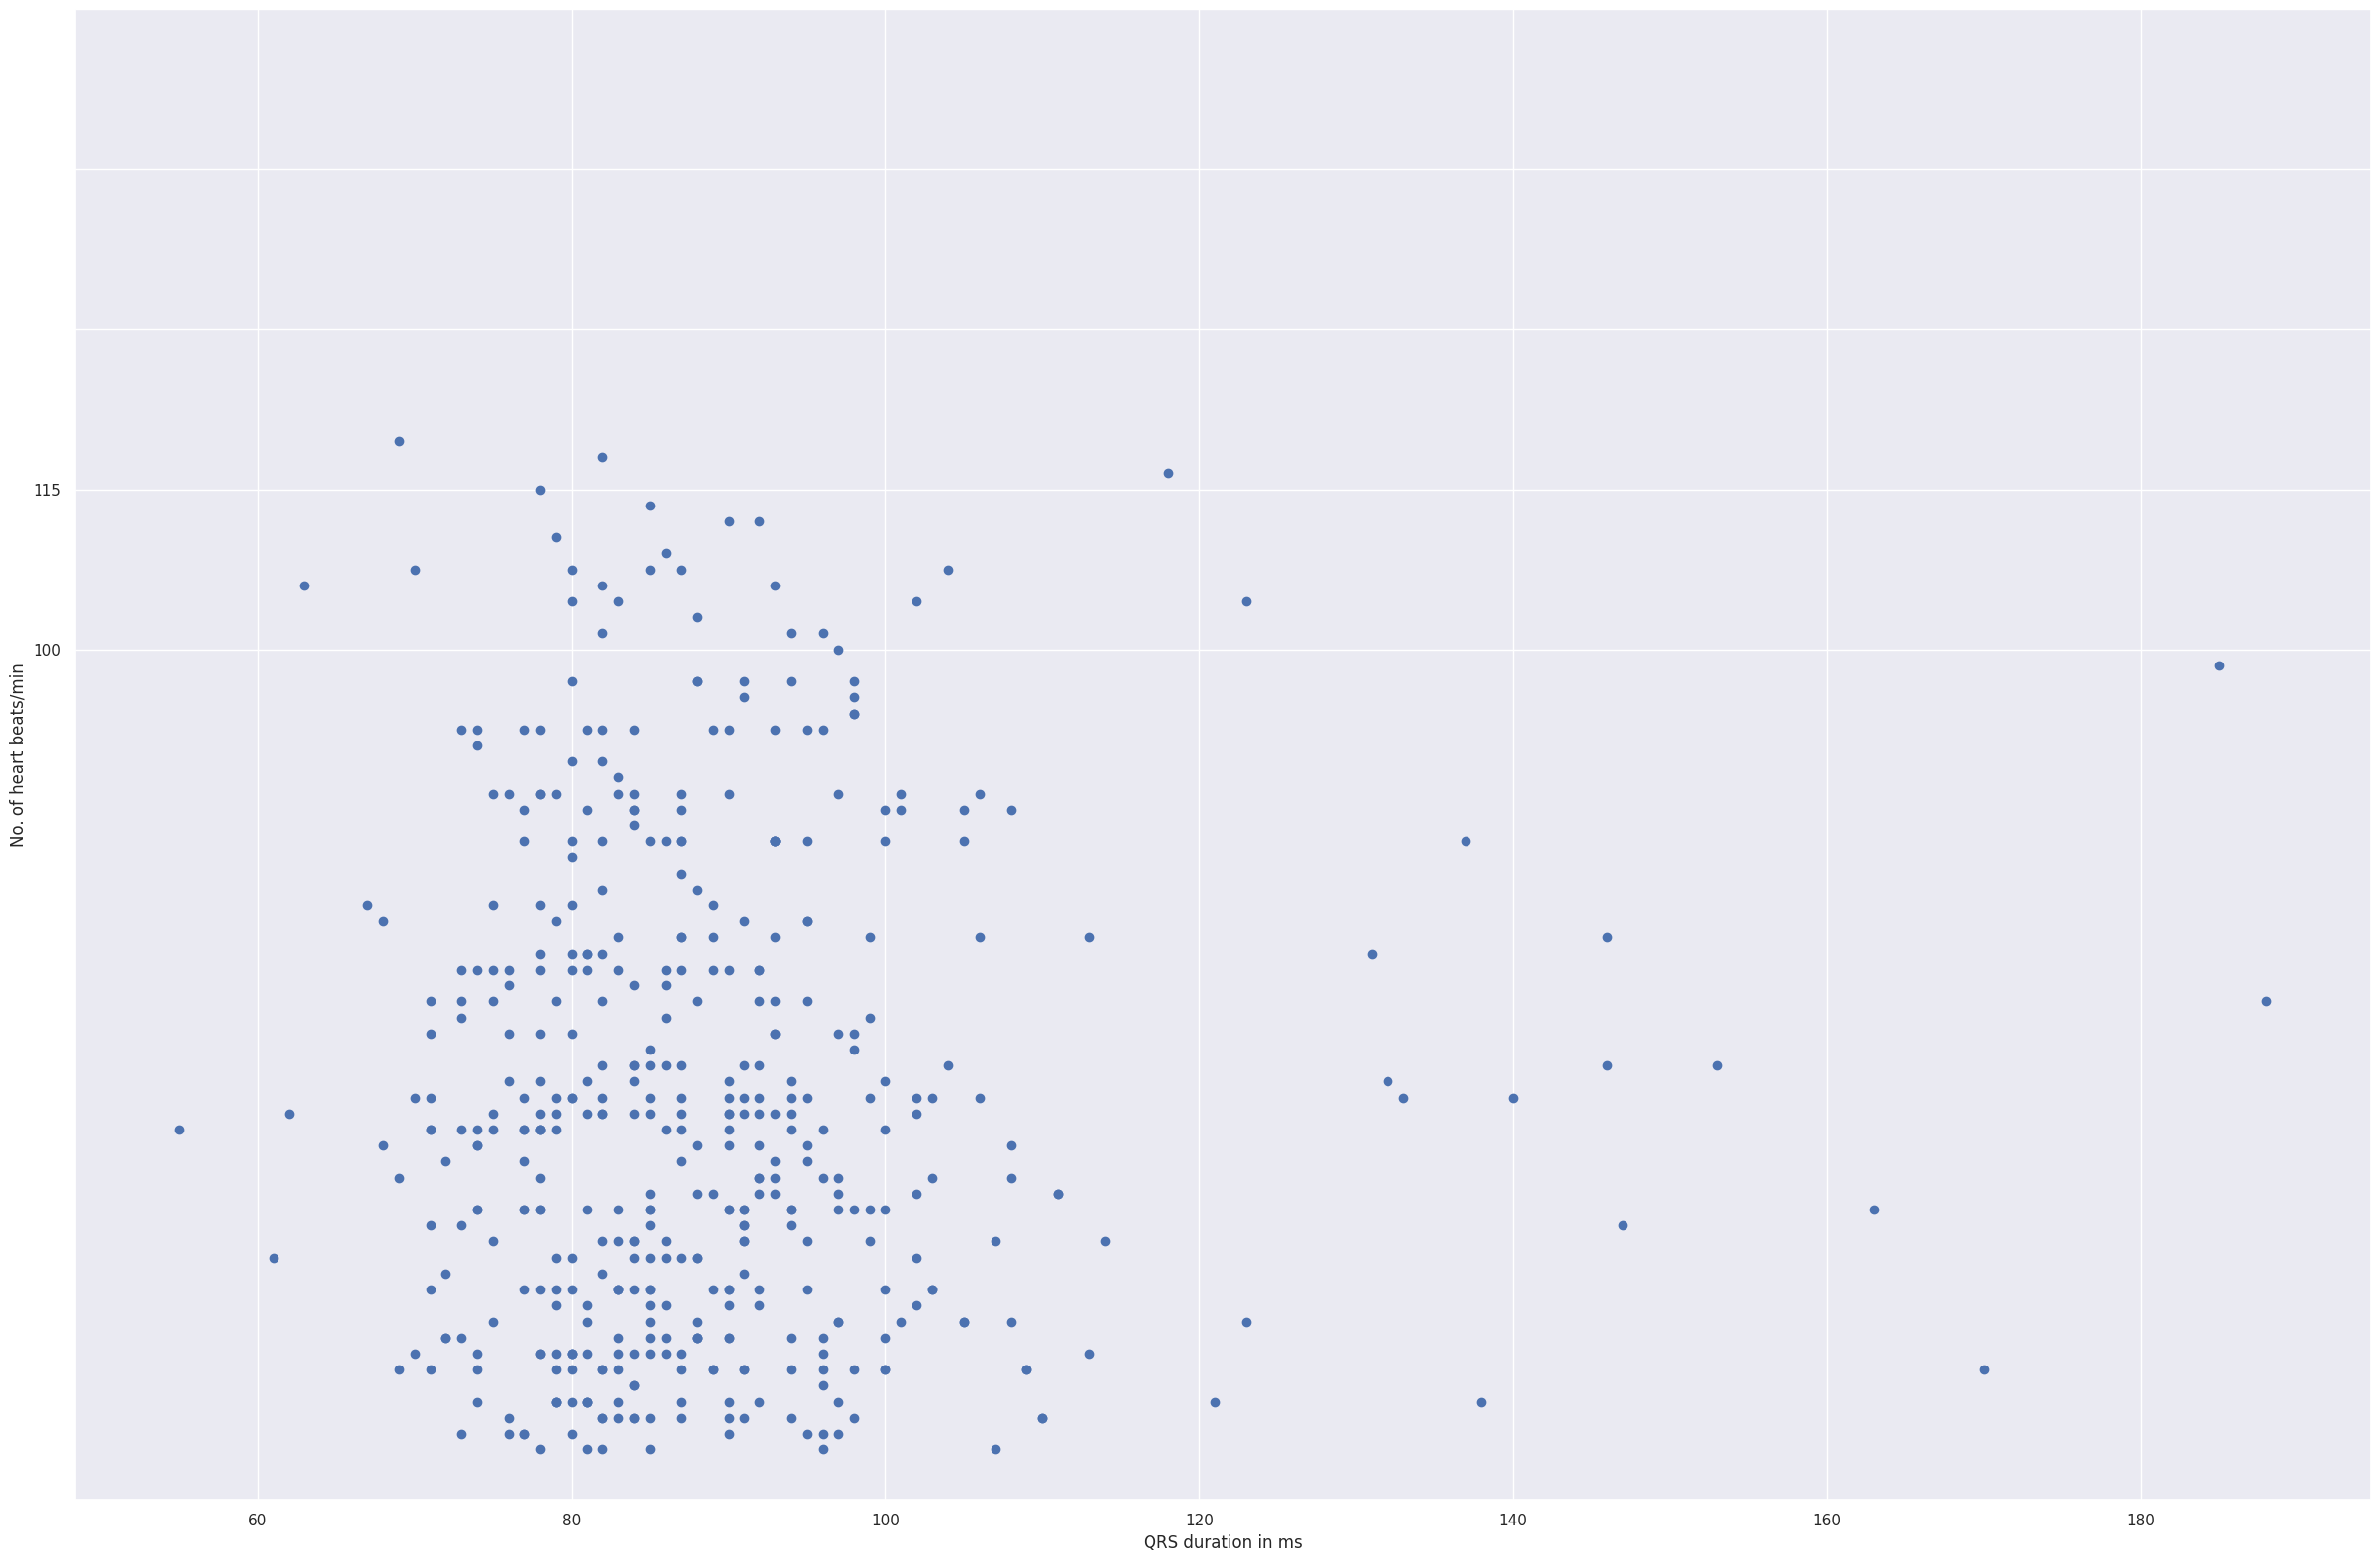

In [209]:
plt.scatter(X_tmp[4], X_tmp[14])
plt.xlabel('QRS duration in ms')
plt.ylabel('No. of heart beats/min')
plt.yticks(np.arange(50, 100, 10))
plt.show()